In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [3]:
rng=np.random.RandomState(1)

In [4]:
X=np.dot(rng.rand(2,2),rng.randn(2,100)).T

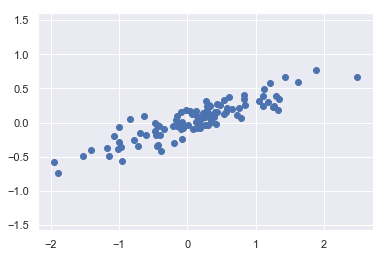

In [7]:
plt.scatter(X[:,0],X[:,1])
plt.axis('equal');

In [10]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

In [11]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [13]:
pca.explained_variance_

array([0.71323427, 0.01483411])

In [15]:
pca.explained_variance_ratio_

array([0.97962538, 0.02037462])

In [18]:
pca.components_

array([[ 0.95257252,  0.30431168],
       [-0.30431168,  0.95257252]])

In [20]:
pca=PCA(n_components=1)
pca.fit(X)
X_pca=pca.transform(X)
print("Orignal Shape:",X.shape)
print("Transformed Shape", X_pca.shape)

Orignal Shape: (100, 2)
Transformed Shape (100, 1)


In [23]:
from sklearn.datasets import load_digits
digits=load_digits()
data=digits.data
data.shape

(1797, 64)

In [25]:
data[9,:]

array([ 0.,  0., 11., 12.,  0.,  0.,  0.,  0.,  0.,  2., 16., 16., 16.,
       13.,  0.,  0.,  0.,  3., 16., 12., 10., 14.,  0.,  0.,  0.,  1.,
       16.,  1., 12., 15.,  0.,  0.,  0.,  0., 13., 16.,  9., 15.,  2.,
        0.,  0.,  0.,  0.,  3.,  0.,  9., 11.,  0.,  0.,  0.,  0.,  0.,
        9., 15.,  4.,  0.,  0.,  0.,  9., 12., 13.,  3.,  0.,  0.])

In [27]:
image_sample=data[0,:].reshape(8,8)

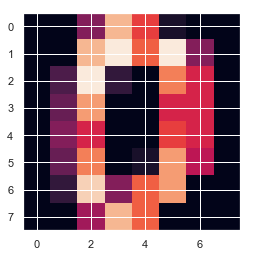

In [29]:
plt.imshow(image_sample)

In [37]:
pca_2=PCA(n_components=16)

In [38]:
converted_data=pca_2.fit_transform(digits.data)
converted_data.shape

(1797, 16)

In [39]:
converted_data[0,:]

array([-1.25946474, 21.27489888, -9.46306753, 13.01419362, -7.12878214,
       -7.44017575,  3.25002984,  2.55322896, -0.58013448,  3.62331666,
        2.58453078,  1.56290239,  0.8794891 , -3.32830108,  6.09092625,
        2.827149  ])

In [46]:
image_2=converted_data[0,:].reshape(4,4)

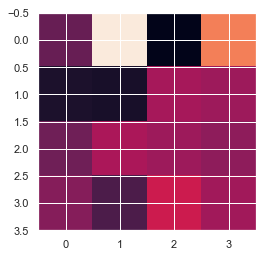

In [47]:
plt.imshow(image_2)

In [50]:
!pip install opencv-python

In [51]:
import cv2

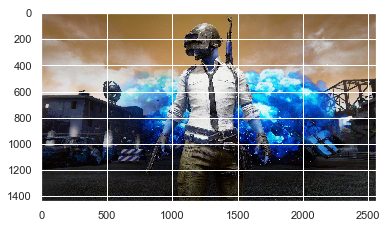

In [65]:
img = cv2.imread('pg.jpg',cv2.COLOR_BGR2RGB)
plt.imshow(img)

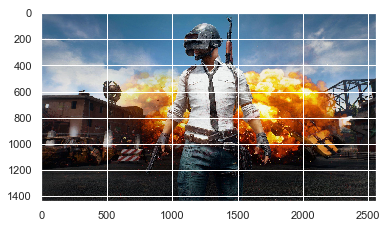

In [68]:
img_rgb= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [69]:
img_rgb.shape

(1440, 2560, 3)

In [70]:
blue,green,red=cv2.split(img_rgb)

In [71]:
blue.shape

(1440, 2560)

In [103]:
pca_3=PCA(n_components=25)
red_transformed=pca_3.fit_transform(red)

In [104]:
red_transformed.shape

(1440, 25)

In [105]:
red_inverted=pca_3.inverse_transform(red_transformed)

In [88]:
green_transformed=pca.fit_transform(green)


In [89]:
green_transformed.shape

(1440, 25)

In [106]:
green_inverted=pca_3.inverse_transform(green_transformed)

In [90]:
blue_transformed=pca.fit_transform(blue)

In [81]:
blue_transformed.shape

(1440, 25)

In [107]:
blue_inverted=pca_3.inverse_transform(blue_transformed)

In [108]:
img_compressed=(np.dstack((red_inverted,red_inverted,red_inverted))).astype(np.uint8)

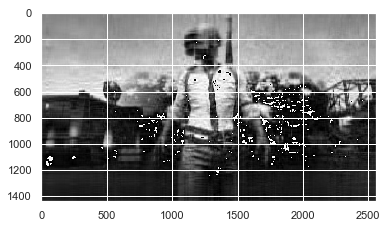

In [109]:
plt.imshow(img_compressed)

In [110]:
#iris data set load to dataframe and applied to PCA

In [111]:
import pandas as pd

In [114]:
df=pd.read_csv("IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [113]:
pca_iris=PCA(n_components=2)

In [117]:
X=df.loc[0:,['sepal_length','sepal_width','petal_length','petal_width']].values

In [133]:
X.shape

(150, 4)

In [134]:
X_new=pca_iris.fit_transform(X)

In [135]:
X_new.shape

(150, 2)

In [136]:
y=df['species']

In [137]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
6         Iris-setosa
7         Iris-setosa
8         Iris-setosa
9         Iris-setosa
10        Iris-setosa
11        Iris-setosa
12        Iris-setosa
13        Iris-setosa
14        Iris-setosa
15        Iris-setosa
16        Iris-setosa
17        Iris-setosa
18        Iris-setosa
19        Iris-setosa
20        Iris-setosa
21        Iris-setosa
22        Iris-setosa
23        Iris-setosa
24        Iris-setosa
25        Iris-setosa
26        Iris-setosa
27        Iris-setosa
28        Iris-setosa
29        Iris-setosa
            ...      
120    Iris-virginica
121    Iris-virginica
122    Iris-virginica
123    Iris-virginica
124    Iris-virginica
125    Iris-virginica
126    Iris-virginica
127    Iris-virginica
128    Iris-virginica
129    Iris-virginica
130    Iris-virginica
131    Iris-virginica
132    Iris-virginica
133    Iris-virginica
134    Iri

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=424)

In [142]:
knn=KNeighborsClassifier(n_neighbors=5)

In [143]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [144]:
predicted= knn.predict(X_test)
print(predicted)

['Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa']


In [145]:
accuracy_score(y_test, predicted)*100

95.55555555555556

In [146]:
#orignal

In [147]:
X_trains, X_tests, y_trains, y_tests = train_test_split(X, y, test_size=0.3, random_state=424)

In [148]:
knnn=KNeighborsClassifier(n_neighbors=5)

In [149]:
knnn.fit(X_trains, y_trains)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [150]:
predicted= knnn.predict(X_tests)
print(predicted)

['Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa']


In [151]:
accuracy_score(y_tests, predicted)*100

97.77777777777777

In [152]:
#workding on IMDB DataSet

In [165]:
import re
import string

In [166]:
import nltk

In [167]:
from nltk import word_tokenize 
from nltk import sent_tokenize
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
from nltk.stem import WordNetLemmatizer
wn1=WordNetLemmatizer()

In [168]:
df_imdb=pd.read_csv('IMDB DATASET.csv')
df_imdb.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [169]:
df_imdb.shape

(50000, 2)

In [170]:
stop_words=nltk.corpus.stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [171]:
def clean(val):
    #"remove chars that are not letters or numbers, downcase, then remove"
    regex = re.compile('([^\s\w]|_)+')
    sentence = regex.sub('',val).lower()
    sentence = sentence.split(" ")
    for word in list(sentence):
        if word in stop_words:
            sentence.remove(word)
    sentence= " ".join(sentence)
    return sentence

In [172]:
clean("the room is beautiful +")

'room beautiful '

In [173]:
def clean_dataframe(data):
    "drop nans then apply clean function to description"
    data = data.dropna(how="any")
    for col in['review']:
        data[col] = data[col].apply(clean)
    return data

In [174]:
data = clean_dataframe(df)
data.head(5)

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,positive
1,wonderful little production br br filming tech...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically theres family little boy jake thinks...,negative
4,petter matteis love time money visually stunni...,positive


In [186]:
dd=pd.DataFrame(data[:500])

In [187]:
data.shape

(50000, 2)

In [188]:
def build_corpus(data):
    corpus=[]
    for col in ['review']:
        for sentence in data[col]:
            word_list=sentence.split(" ")
            corpus.append(word_list)
    return corpus

In [189]:
corpus= build_corpus(dd)
corpus[0:10]

[['one',
  'reviewers',
  'mentioned',
  'watching',
  '1',
  'oz',
  'episode',
  'youll',
  'hooked',
  'right',
  'exactly',
  'happened',
  'mebr',
  'br',
  'first',
  'thing',
  'struck',
  'oz',
  'brutality',
  'unflinching',
  'scenes',
  'violence',
  'set',
  'right',
  'word',
  'go',
  'trust',
  'show',
  'faint',
  'hearted',
  'timid',
  'show',
  'pulls',
  'punches',
  'regards',
  'drugs',
  'sex',
  'violence',
  'hardcore',
  'classic',
  'use',
  'wordbr',
  'br',
  'called',
  'oz',
  'nickname',
  'given',
  'oswald',
  'maximum',
  'security',
  'state',
  'penitentary',
  'focuses',
  'mainly',
  'emerald',
  'city',
  'experimental',
  'section',
  'prison',
  'cells',
  'glass',
  'fronts',
  'face',
  'inwards',
  'privacy',
  'high',
  'agenda',
  'em',
  'city',
  'home',
  'manyaryans',
  'muslims',
  'gangstas',
  'latinos',
  'christians',
  'italians',
  'irish',
  'moreso',
  'scuffles',
  'death',
  'stares',
  'dodgy',
  'dealings',
  'shady',
  'a

In [190]:
len(corpus)

500

In [191]:

import gensim
from gensim.models import word2vec

In [192]:
model= word2vec.Word2Vec(corpus,size=5,window=20,min_count=2,workers=4)
model.wv['standard']

array([ 0.08940095, -0.5493916 , -0.11017554, -0.9039835 ,  0.06776284],
      dtype=float32)

In [193]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [217]:
def timeplot(model):
    labels=[]
    tokens=[]
    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
        
    tsne_model=TSNE(perplexity=40,n_components=2,init='pca',n_iter=2500)
    new_values=tsne_model.fit_transform(tokens)
    
    x=[]
    y=[]
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    plt.figure(figsize=(16,16))
    for i in range(len(x)):
        plt.scatter(x[i].y[i])
        plt.annotate(labels[i],
        xy=(x[i],y[i]),
        xytext=(5,2),
        textcoords='offset points',
        ha='right',
        va='bottom')
    plt.show()

In [ ]:
timeplot(model)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
